# introduction to regression with neural networks in TensorFlow

In [96]:
# import TensorFlow
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.1


#Creating data to view and fit

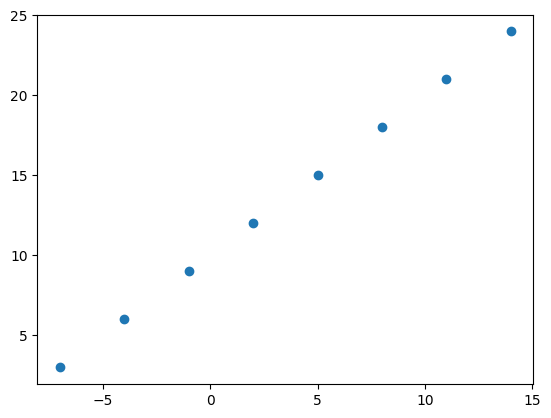

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [98]:
y == X + 10

<tf.Tensor: shape=(8,), dtype=bool, numpy=array([ True,  True,  True,  True,  True,  True,  True,  True])>

# input and output shapes

In [99]:
# creating a demo tensor for a housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [100]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

In [101]:
X[1], y[1]

(<tf.Tensor: shape=(), dtype=float32, numpy=-4.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.0>)

In [102]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

In [103]:
# turning NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [104]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

(TensorShape([8]), TensorShape([8]))

## steps in modeling with tensorflow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **compiling a model** - define the loss function (in other words, the function which tells the model how wrong it is) and the optimizer (tells the model how to improve the patterns its learning) and evaluation metrics (what can be used to interpret the performance of a model)
3. **fitting a model** - letting this model try to find patterns between X & y (features and labels)

In [105]:
import tensorflow as tf

# Create features (using tensors)
# X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
# Create labels (using tensors)
# y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# turn this numpy array into tensor with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
# turn this numpy array into tensor with dtype float32
y = tf.cast(tf.constant(y), dtype=tf.float32)
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated line

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step - loss: 13.4859 - mae: 13.4859
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 13.3534 - mae: 13.3534
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 13.2209 - mae: 13.2209
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 13.0884 - mae: 13.0884
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 12.9559 - mae: 12.9559


In [106]:
# check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [108]:
import numpy as np

my_list = [17.0]
my_array = np.array(my_list)
my_array

array([17.])

In [109]:
model.predict([my_array])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


array([[3.0932705]], dtype=float32)

## improving the model
we can improve a model, by altering the steps we took to create a model.

1. **creating a model** - maybe even more layers, increasing the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **compiling a model** - maybe change the optimization function or perhaps the **learning rate** of the optimization function.
3. **fitting a model** - here we might fit a model for more **epochs** or on more data (give the model more examples to learn from)

In [110]:
#rebuild the model

# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# fit the model (this time train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step - loss: 16.0505 - mae: 16.0505
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 15.7693 - mae: 15.7693
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 15.4880 - mae: 15.4880
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 15.2068 - mae: 15.2068
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 14.9354 - mae: 14.9354
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 14.8029 - mae: 14.8029
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 14.6704 - mae: 14.6704
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 14.5379 - mae: 14.5379
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 14.4054 - mae: 14.4054
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 14.2729 - mae: 14.2729
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 14.1404 - mae: 14.1404
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 14.0079 - mae: 14.0079
Epoch 13/100
1/1 ━━━━━

In [111]:
# the values:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [112]:
# model.predict([17.0])

import numpy as np

# Convert the single value to a NumPy array and reshape it to match the input shape
prediction = model.predict(np.array([17.0]).reshape(1, 1))

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[29.48256]]


In [113]:
# another one to improve the model

# 1. create the model (this time with an extra hidden layer with 100 hidden units)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1)
])

# 2 compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["mae"])

# 3 fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step - loss: 6.8250 - mae: 6.8250
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 6.8249 - mae: 6.8249
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 6.8249 - mae: 6.8249
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 6.8248 - mae: 6.8248
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 6.8247 - mae: 6.8247
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 6.8246 - mae: 6.8246
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 6.8246 - mae: 6.8246
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 6.8245 - mae: 6.8245
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 6.8244 - mae: 6.8244
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 6.8243 - mae: 6.8243
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 6.8243 - mae: 6.8243
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 6.8242 - mae: 6.8242
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/st

In [114]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [115]:
# model.predict([17.0])

import numpy as np

# Convert the single value to a NumPy array and reshape it to match the input shape
prediction = model.predict(np.array([17.0]).reshape(1, 1))

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[[29.492561]]


## Evaluating a model

typical practice for building neural networks:

build a model -> fit the model -> evaluate the model -> tweak the model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it...

why its important to visualize:
- the data - what data are we working with? What does it look like?
- the model itself - what does the model look like?
- the training of a model - how does a model perform while it learns?
- the predicitons of the model - how the predictions of a model line up against the ground truth (the original labels)?

In [116]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [117]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

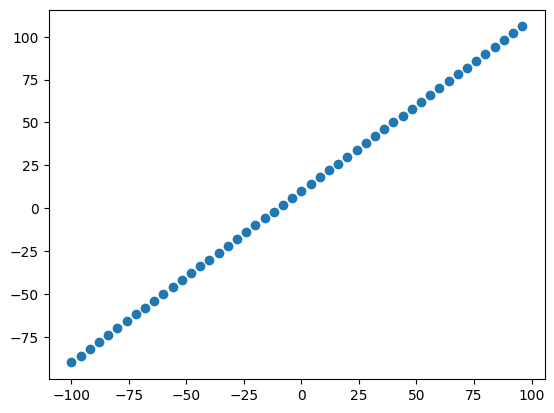

In [118]:
# visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### the 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [119]:

# split the data into train and test data
X_train = X[:40] #first 40 are training samples (80% of the data)
y_train = y[:40]
X_test = X[40:] #last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

#
print("length of xtrain: ", len(X_train))
print("length of ytrain: ", len(y_train))
print("length of xtest: ", len(X_test))
print("length of ytest: ", len(y_test))
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

length of xtrain:  40
length of ytrain:  40
length of xtest:  10
length of ytest:  10
Shape of X_train: (40,)
Shape of y_train: (40,)
Shape of X_test: (10,)
Shape of y_test: (10,)


In [120]:
#check the length of how many samples we have
len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

**Visualizing the data**

visualising the test and training sets

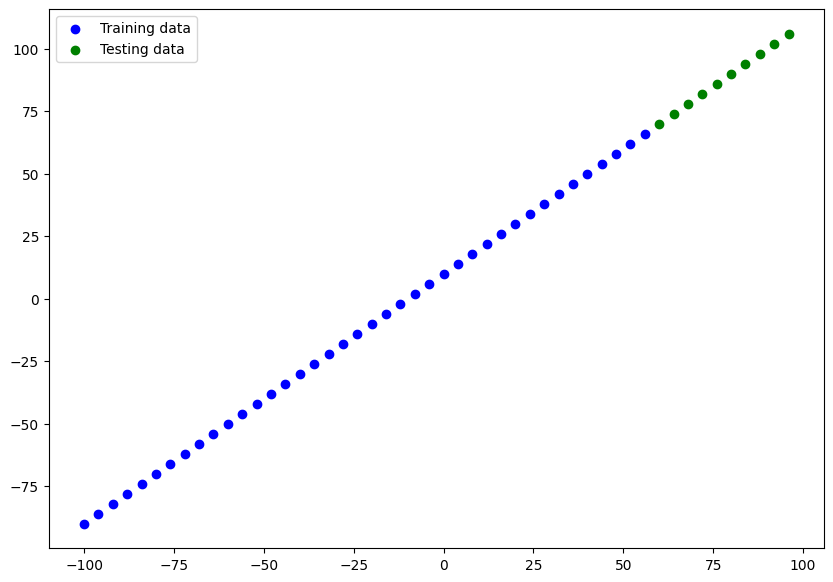

In [121]:
plt.figure(figsize=(10, 7))
# plot the training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# show a legend
plt.legend();
#

In [122]:
# building a neural network for the data
# 1. create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [123]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# lets create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
  tf.keras.layers.Dense(10, activation='relu', name="hidden_layer"), # Added hidden layer
  tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200, verbose=0)

# Make some predictions
y_pred = model.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[59.254814],
       [63.067665],
       [66.88051 ],
       [70.69335 ],
       [74.5062  ],
       [78.319046],
       [82.1319  ],
       [85.94473 ],
       [89.75758 ],
       [93.570435]], dtype=float32)

In [124]:

model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer (Dense)                 │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 143 (576.00 B)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

* Total params - total number of parameters in the model.
* Trainable params - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters are not updated during training

In [125]:
# lets fit the model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [126]:
# get summary of my model
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer (Dense)                 │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 143 (576.00 B)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

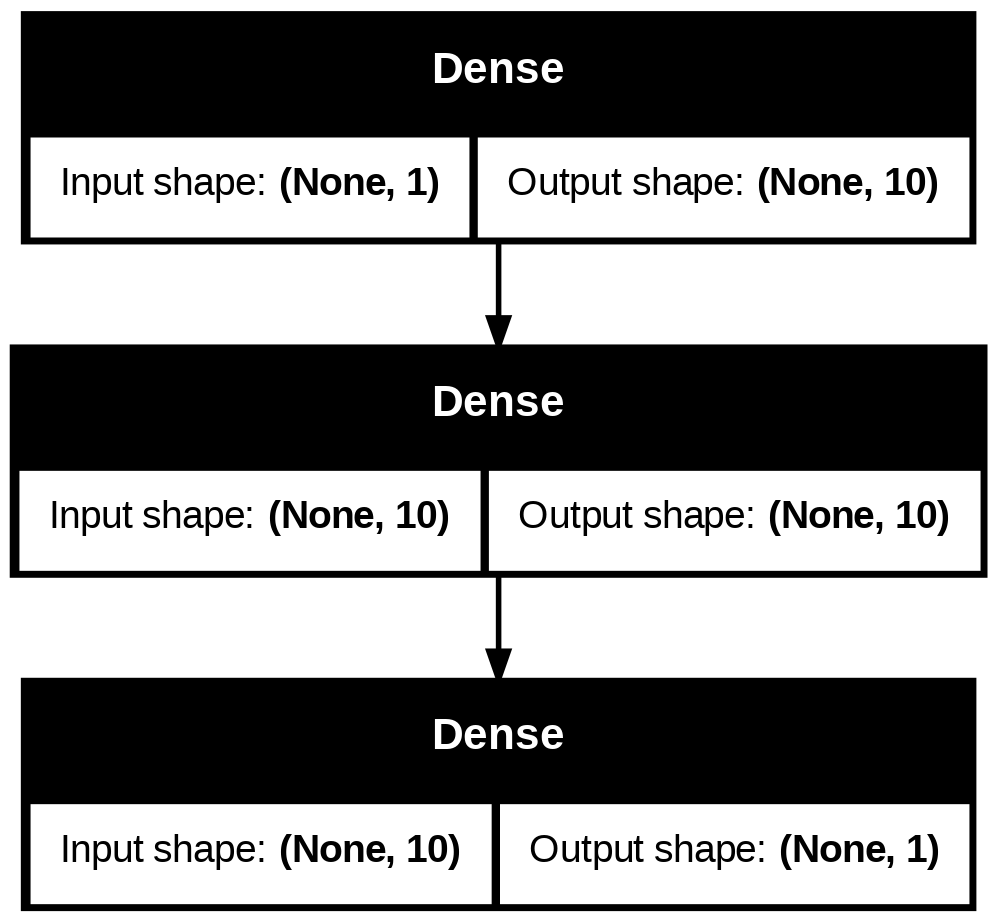

In [127]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

Visualizing models' prediction

to visualize predictions, let's plot them against the ground truth labels.



In [128]:
# make some predictions
y_pred = model.predict(X_test)
print(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
tf.Tensor([60 64 68 72 76 80 84 88 92 96], shape=(10,), dtype=int32)


array([[ 79.42543 ],
       [ 84.51555 ],
       [ 89.60568 ],
       [ 94.69581 ],
       [ 99.785934],
       [104.87606 ],
       [109.96619 ],
       [115.056305],
       [120.14643 ],
       [125.236565]], dtype=float32)

In [129]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [130]:
# lets create a plotting function
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=y_pred):

  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot models prediction in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();


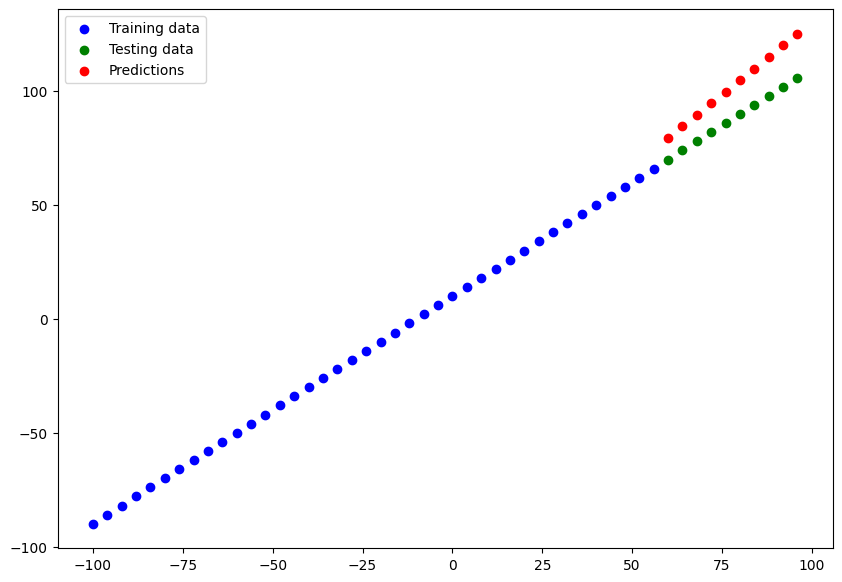

In [131]:
plot_predictions()

### evaluating models predictions with regression evaluation metrics
due to working on a regression, there are two of the main metrics to evaluate any models performance:
* Mean Absolute Error (MAE), on average, how wrong is each of my models predictons
* Mean Squared Error (MSE), square the average errors

In [132]:
# evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 14.3310 - mae: 14.3310


[14.330995559692383, 14.330995559692383]

In [133]:
import keras
# mae = tf.keras.losses.mean_absolute_error(y_true=y_test, # mae was already defined to reference the class MeanAbsoluteError. Change the name
#                                            y_pred=tf.squeeze(y_pred))
# tf.squeeze removes extra dimension from y_pred
mae_result = keras.losses.mean_absolute_error(y_true=y_test,
                                           y_pred=tf.squeeze(y_pred))

# Print the result
print(mae_result) # Use .numpy() to get the numerical value from the Ea

tf.Tensor(14.330996, shape=(), dtype=float32)


In [134]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 79.42543 ],
       [ 84.51555 ],
       [ 89.60568 ],
       [ 94.69581 ],
       [ 99.785934],
       [104.87606 ],
       [109.96619 ],
       [115.056305],
       [120.14643 ],
       [125.236565]], dtype=float32)>

In [135]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 79.42543 ,  84.51555 ,  89.60568 ,  94.69581 ,  99.785934,
       104.87606 , 109.96619 , 115.056305, 120.14643 , 125.236565],
      dtype=float32)>

In [136]:
import keras

# Calculate MAE using keras.losses.mean_absolute_error mean absolute error
mae_result = keras.losses.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))

# Print the MAE value
mae_result.numpy()


14.330996

In [137]:
y_pred

array([[ 79.42543 ],
       [ 84.51555 ],
       [ 89.60568 ],
       [ 94.69581 ],
       [ 99.785934],
       [104.87606 ],
       [109.96619 ],
       [115.056305],
       [120.14643 ],
       [125.236565]], dtype=float32)

In [138]:
y_test


<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [139]:
y_pred.shape, y_test.shape

((10, 1), TensorShape([10]))

In [140]:
import tensorflow as tf
y_pred = tf.squeeze(y_pred)
print(y_pred)
print(y_test)


tf.Tensor(
[ 79.42543   84.51555   89.60568   94.69581   99.785934 104.87606
 109.96619  115.056305 120.14643  125.236565], shape=(10,), dtype=float32)
tf.Tensor([ 70  74  78  82  86  90  94  98 102 106], shape=(10,), dtype=int32)


In [141]:
mse_fn = tf.keras.losses.MeanSquaredError()
mse = mse_fn(y_test, y_pred)
print("MSE: ",mse.numpy())

MSE:  215.18152


In [142]:
# Manipulation of pred to adjust and minimalize the difference
y_pred = y_pred - 12
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 67.42543 ,  72.51555 ,  77.60568 ,  82.69581 ,  87.785934,
        92.87606 ,  97.96619 , 103.056305, 108.14643 , 113.236565],
      dtype=float32)>

In [143]:
mse_fn = tf.keras.losses.MeanSquaredError()
mse = mse_fn(y_test, y_pred)
print("MSE: ",mse.numpy())

MSE:  15.237627


In [144]:
mse_fn = tf.keras.losses.MeanSquaredError()
mse = mse_fn(y_true=y_test, y_pred=y_pred)
print("MSE: ",mse.numpy())

MSE:  15.237627


In [145]:
import keras

# Calculate MAE using keras.losses.mean_absolute_error mean absolute error
mae_result = keras.losses.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))

# Print the MAE value
mae_result.numpy()

3.221663

In [146]:
# make some functions to reuse MAE and MSE
import tensorflow as tf

# Funktionen zur Berechnung von MAE und MSE
def mae(y_true, y_pred):
    return tf.keras.losses.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.keras.losses.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

### running experiments to improve previous model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it...
```
1. get more data - get more examples for the model to train on (more opportunities to learn patterns or relationships between features and labels).
2. make the model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. train for longer - give that model more of a chance to find patterns in the data

Lets do 3 modelling experiments:
1. 'model_1' - same as the original model, 1 layer, trained for 100 epochs
2. 'model_2' - 2 layers, trained for 100 epochs
3. 'model_3' - 2 layers, trained for 500 epochs

In [147]:
# set random seed
tf.random.set_seed(42)

# 1. create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),  # Definiere die Eingabeform hier
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # <- updated line
#model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 15.3979 - mae: 15.3979 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.6453 - mae: 19.6453 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.9557 - mae: 23.9557 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 11.5359 - mae: 11.5359
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 16.8700 - mae: 16.8700 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.0867 - mae: 22.0867 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 12.8714 - mae: 12.8714 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16.7458 - mae: 16.7458 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 22.5407 - mae: 22.5407
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.6451 - mae: 12.6451 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.8827 - mae: 16.8827 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.6498 - mae: 22.6498 
Epoch 13/100
2/2 ━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


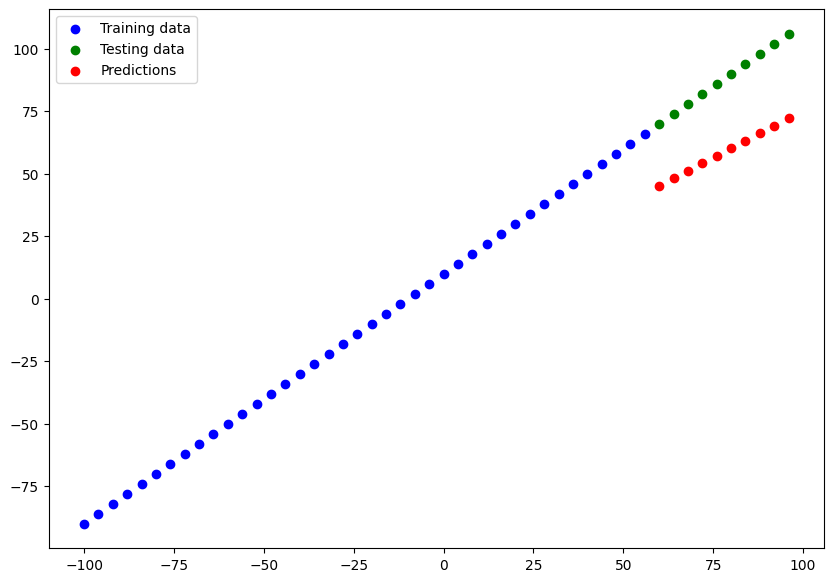

In [148]:
# make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [149]:
y_test, y_preds_1


(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 array([[45.13303 ],
        [48.1419  ],
        [51.15077 ],
        [54.159637],
        [57.168507],
        [60.177376],
        [63.18624 ],
        [66.195114],
        [69.20398 ],
        [72.212845]], dtype=float32))

In [150]:
# calculate model_1 evaluation metrics
#mae_1 = mae(y_test, tf.squeeze(y_preds_1))
#mse_1 = mse(y_test, tf.squeeze(y_preds_1))


import tensorflow as tf

# Angenommen, y_test ist ein Tensor mit dtype int32
# y_preds_1 ist ein NumPy Array mit dtype float32

# Konvertiere y_test in float32
y_test = tf.cast(y_test, dtype=tf.float32)

# Berechne MAE und MSE direkt
mae_1 = tf.reduce_mean(tf.abs(y_test - tf.squeeze(y_preds_1))).numpy()
mse_1 = tf.reduce_mean(tf.square(y_test - tf.squeeze(y_preds_1))).numpy()

print(f"MAE: {mae_1}, MSE: {mse_1}")


MAE: 29.32706069946289, MSE: 868.1808471679688


In [151]:
# set random seed
tf.random.set_seed(42)

# 1. create the model
model_2 = tf.keras.Sequential([
    #tf.keras.layers.Input(shape=(1,)),  # Definiere die Eingabeform hier
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])


# 2. compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. fit the model
model_2.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # <- updated line
#model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 67.5461 - mse: 6348.4414 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 45.8437 - mse: 3082.6943 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 33.2563 - mse: 1607.1082 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 28.5292 - mse: 1205.0880 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.9140 - mse: 103.7503 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.8643 - mse: 450.0747 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24.1874 - mse: 840.6474  
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.0489 - mse: 744.8443
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 24.3700 - mse: 867.0660  
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.7888 - mse: 105.1817 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15.2894 - mse: 402.8549 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.5522 - mse: 806.5198  
Epoch 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


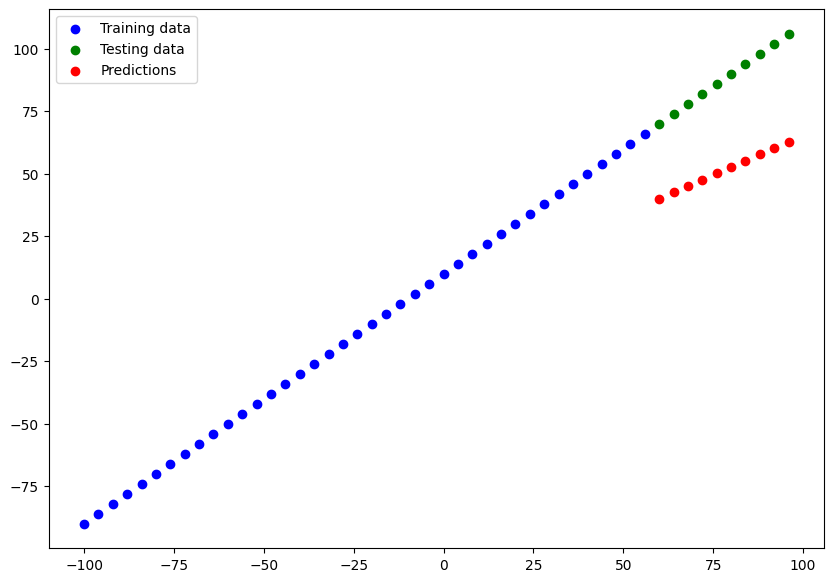

In [152]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [153]:
y_preds_2, y_test

(array([[40.00496 ],
        [42.54369 ],
        [45.082424],
        [47.621155],
        [50.15989 ],
        [52.69862 ],
        [55.23735 ],
        [57.776085],
        [60.314816],
        [62.853546]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
       dtype=float32)>)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


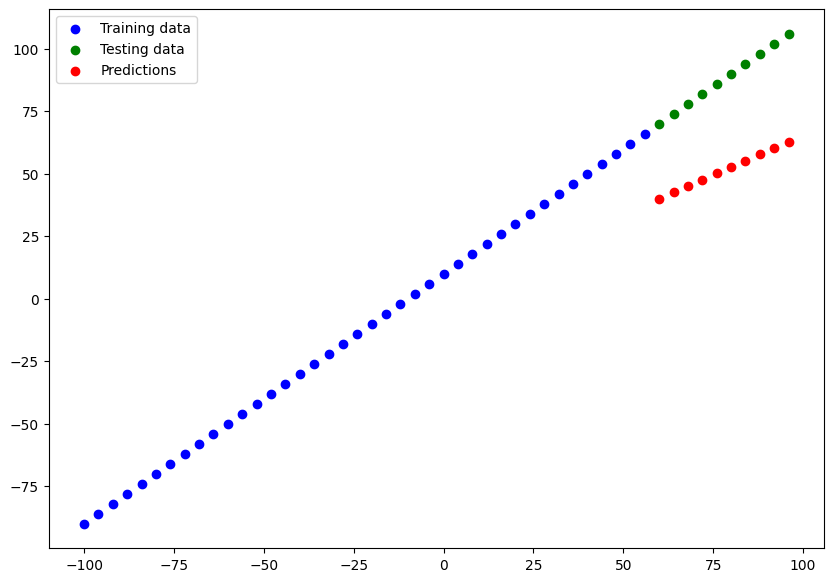

In [154]:
# make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [155]:
y_preds_2, y_test

(array([[40.00496 ],
        [42.54369 ],
        [45.082424],
        [47.621155],
        [50.15989 ],
        [52.69862 ],
        [55.23735 ],
        [57.776085],
        [60.314816],
        [62.853546]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
       dtype=float32)>)

In [156]:
# y_preds_2 in ein 1D-Array umformen
y_preds_2 = tf.squeeze(y_preds_2)

In [157]:
y_preds_2, y_test

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([40.00496 , 42.54369 , 45.082424, 47.621155, 50.15989 , 52.69862 ,
        55.23735 , 57.776085, 60.314816, 62.853546], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
       dtype=float32)>)

In [158]:
import tensorflow as tf

# Funktionen zur Berechnung von MAE und MSE
def mae(y_true, y_pred):
    return tf.reduce_mean(tf.abs(y_true - y_pred))

def mse(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Umformen von y_preds_2 in ein 1D-Array
y_preds_2 = tf.squeeze(y_preds_2)

# Berechnung der Metriken
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)

# Ausgabe der Ergebnisse
print("MAE:", mae_2.numpy())
print("MSE:", mse_2.numpy())

MAE: 36.570747
MSE: 1355.0358


In [159]:
# calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=36.570747>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1355.0358>)

**build model_3**

In [160]:
#set random seed
tf.random.set_seed(42)

# create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. fit the model
model_3.fit(tf.expand_dims(X, axis=-1), y, epochs=500) # <- updated line
#

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 24.5001 - mae: 24.5001 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21.2931 - mae: 21.2931  
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 25.6977 - mae: 25.6977
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 25.4207 - mae: 25.4207
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.9178 - mae: 9.9178 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.5842 - mae: 14.5842 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.5026 - mae: 23.5026 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22.7887 - mae: 22.7887 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 24.3033 - mae: 24.3033 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.7903 - mae: 9.7903 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.2969 - mae: 15.2969 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.5763 - mae: 23.5763 
Epoch 13/500
2/2 ━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


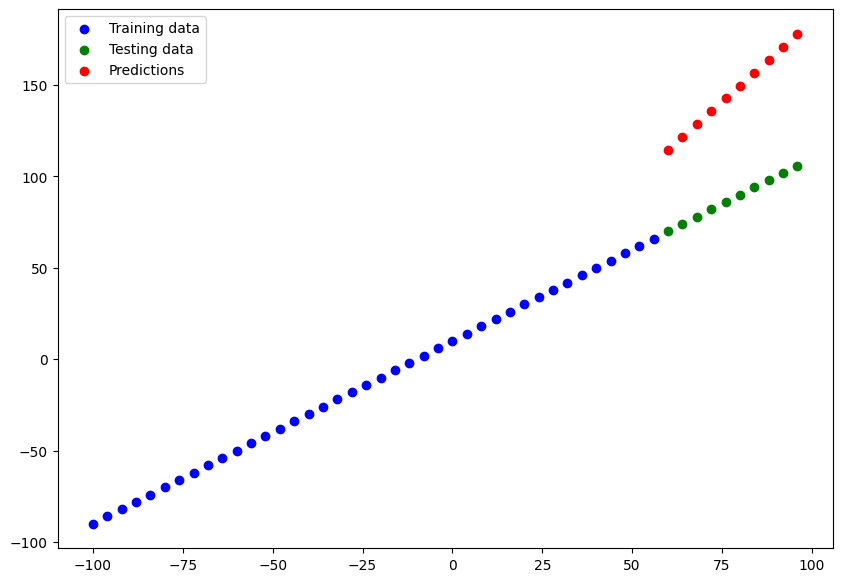

In [161]:
# make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [162]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=58.220047>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3935.1348>)

# comparing the results of previous experiments
weve run a few experiments, lets compare the results

In [163]:
import pandas as pd

# Angenommen, mae_1, mae_2, mae_3, mse_1, mse_2 und mse_3 sind TensorFlow-Tensoren
model_results = [
    ["model_1", mae_1, mse_1],
    ["model_2", mae_2.numpy(), mse_2.numpy()],
    ["model_3", mae_3.numpy(), mse_3.numpy()]
]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
print(all_results)

     model        mae          mse
0  model_1  29.327061   868.180847
1  model_2  36.570747  1355.035767
2  model_3  58.220047  3935.134766


model 2 performed the best


In [164]:
model_2.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

in the current version, the best ways to save a model are:
1. SavedModel_format/ = model_2.export("best_model_SavedModel_format/")
2. model_2.save("best_model_HDF5_format.h5")


In [165]:
# tracking experiments
# save model using savedModel format
#model_2.save("best_model.h5")
model_2.export("best_model_SavedModel_format/")
#model_2.save("best_model.keras")
#model_2.save("best_model_HDF5_format.h5")

Saved artifact at 'best_model_SavedModel_format/'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_40')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  139054596462144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139054596254784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139054598363568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139054598368496: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [166]:
#alte version:
#best_model_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format/")
#best_model_SavedModel_format.summary()

#neu:
from keras.layers import TFSMLayer

# load as TFSMLayer
#best_model_SavedModel_format = TFSMLayer("best_model_SavedModel_format/", call_endpoint='serving_default')
#using the layer to make plot_predictions
# Beispiel: predictions = best_model_SavedModel_format(input_data)

model_2.save("best_model.keras")
loaded_kerasModel = tf.keras.models.load_model("best_model.keras")
loaded_kerasModel.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

compare model_2 predictions with the saved model format predictions


In [167]:
model_2.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [168]:
model_2_preds = model_2.predict(X_test)
kerasModel_preds = loaded_kerasModel.predict(X_test)
kerasModel_preds == model_2_preds

#

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [169]:
# load in a model using the .h5 format

Download a model from Google Colab

In [170]:
from google.colab import files
files.download("/content/best_model_SavedModel_format/")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [171]:
!cp /content/best_model_SavedModel_format /content/drive/MyDrive/Tensorflow_Course

cp: -r not specified; omitting directory '/content/best_model_SavedModel_format'


In [172]:
!ls /content/drive/MyDrive/Tensorflow_Course

Larger example

In [173]:
# import required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [174]:
#read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [175]:
#insurance_one_hot = pd.get_dummies(insurance)
insurance_number = pd.get_dummies(insurance)
insurance_number = insurance_number.astype(int)
#insurance_number
insurance_number.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,1,0,0,1,0,0,0,1
1,18,33,1,1725,0,1,1,0,0,0,1,0
2,28,33,3,4449,0,1,1,0,0,0,1,0
3,33,22,0,21984,0,1,1,0,0,1,0,0
4,32,28,0,3866,0,1,1,0,0,1,0,0


In [176]:
# creating x&y values (features and labels)
X = insurance_number.drop("charges", axis=1)
y = insurance_number["charges"]


In [177]:
# view x
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,1,0,0,1,0,0,0,1
1,18,33,1,0,1,1,0,0,0,1,0
2,28,33,3,0,1,1,0,0,0,1,0
3,33,22,0,0,1,1,0,0,1,0,0
4,32,28,0,0,1,1,0,0,1,0,0


In [178]:
#viewing y
y.head()

,charges
0,16884
1,1725
2,4449
3,21984
4,3866


In [179]:
# creating training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [180]:
# building a neural network
tf.random.set_seed(42)

# create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# compiling the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# fitting the model
insurance_model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13155.8818 - mae: 13155.8818
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12132.5840 - mae: 12132.5840
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12044.5068 - mae: 12044.5068
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11937.0918 - mae: 11937.0918
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11746.1748 - mae: 11746.1748
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11376.1768 - mae: 11376.1768
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10728.8594 - mae: 10728.8594
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9954.1660 - mae: 9954.1660
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9269.8750 - mae: 9269.8750
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8819.8086 - mae: 8819.8086
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8632.5312 - mae: 8632.5312
Epoch 12/100
42/42 ━━━━━━━━━━━━━━━━━━━

In [181]:
# checkin results of insurance model on test data
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8770.8887 - mae: 8770.8887  


[8598.82421875, 8598.82421875]

In [182]:
y_train.median(), y_train.mean()

(9574.5, 13345.596261682243)

Improving the model due to unfavourable error values
to imporve the model, I'll run 2 experiments:
1. Add an extra layer with more hidden units
2. Train for longer

In [183]:
X_train, y_train

(      age  bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 560    46   19         2           1         0          1           0   
 1285   47   24         0           1         0          1           0   
 1142   52   24         0           1         0          1           0   
 969    39   34         5           1         0          1           0   
 486    54   21         3           1         0          1           0   
 ...   ...  ...       ...         ...       ...        ...         ...   
 1095   18   31         4           1         0          1           0   
 1130   39   23         5           1         0          1           0   
 1294   58   25         0           0         1          1           0   
 860    37   47         2           1         0          0           1   
 1126   55   29         0           0         1          1           0   
 
       region_northeast  region_northwest  region_southeast  region_southwest  
 560                  0       

In [184]:
# building a neural network
tf.random.set_seed(42)

# create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# compiling the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# fitting the model
insurance_model_2.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=1)

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12785.8818 - mae: 12785.8818
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11347.0098 - mae: 11347.0098
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10876.3174 - mae: 10876.3174
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9954.1396 - mae: 9954.1396
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9769.2354 - mae: 9769.2354
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9638.1328 - mae: 9638.1328
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9701.7305 - mae: 9701.7305
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9348.2676 - mae: 9348.2676
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9366.9609 - mae: 9366.9609
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9431.9727 - mae: 9431.9727
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9592.8643 - mae: 9592.8643
Epoch 12/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms

In [185]:
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8878.6914 - mae: 8878.6914  


[8755.658203125, 8755.658203125]

In [186]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8770.8887 - mae: 8770.8887 


[8598.82421875, 8598.82421875]

In [187]:
# set random seed
tf.random.set_seed(42)

# 1. create the model (same as above)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# fit the model
history = insurance_model_3.fit(tf.expand_dims(X, axis=-1), y, epochs=200)

Epoch 1/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 13220.6836 - mae: 13220.6836
Epoch 2/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13200.3389 - mae: 13200.3389
Epoch 3/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13151.8154 - mae: 13151.8154
Epoch 4/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13044.7539 - mae: 13044.7539
Epoch 5/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12849.7500 - mae: 12849.7500
Epoch 6/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12565.6592 - mae: 12565.6592
Epoch 7/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12250.5244 - mae: 12250.5244
Epoch 8/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12040.4395 - mae: 12040.4395
Epoch 9/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11985.0049 - mae: 11985.0049
Epoch 10/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11959.0391 - mae: 11959.0391
Epoch 11/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11933.5410 - mae: 11933.5410
Epoch 12/200
42/42 ━━━━━━━━━━━

In [188]:
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8766.9961 - mae: 8766.9961  


[8609.8203125, 8609.8203125]

In [189]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8770.8887 - mae: 8770.8887 


[8598.82421875, 8598.82421875]

Text(0.5, 0, 'epochs')

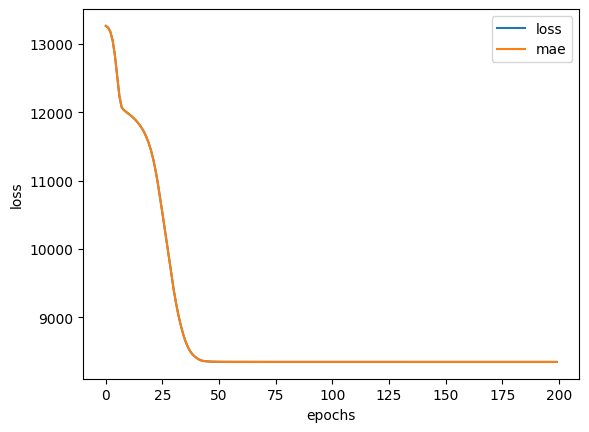

In [190]:
# plot history (also known as a loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

How long should a model be trained for? depends on every single problem. Tensorflows solution is the [EarlyStopping Callback] (https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), a Tensorflow component that can be added to a model to stop training once it stops improving a certain metric

## Preprocessing data (normalization and stanardization)
in terms of scaling values, neural networks tend to prefer normalization.

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


to prepare the data, let's borrow a few classes from scikit-learn.

In [197]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# creating column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# creating X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# build the train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit the column transformer on the training data only
ct.fit(X_train)

# transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

# lets see how the data look like
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [198]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [199]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

data has been normalized and one hot encoded. now lets build a neural network model

In [201]:
# neural network model to fit the normalized data
tf.random.set_seed(42)

#1. create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compiling the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 13297.4180 - mae: 13297.4180
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13290.8125 - mae: 13290.8125
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13274.4385 - mae: 13274.4385
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13238.1367 - mae: 13238.1367 
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13170.6621 - mae: 13170.6621
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13060.4209 - mae: 13060.4209 
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12896.6670 - mae: 12896.6670
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12669.2783 - mae: 12669.2783
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12368.4141 - mae: 12368.4141
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11986.4062 - mae: 11986.4062 
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11529.2676 - mae: 11529.2676 
Epoch 12/200
34/34 ━━━━━━━

In [202]:
# evaluate the insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3214.1304 - mae: 3214.1304  


[3161.07666015625, 3161.07666015625]

In [ ]:
# insurance model 2 results, big differences just by normalizing the data
# 9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8878.6914 - mae: 8878.6914  [8755.658203125, 8755.658203125]

In [200]:
insurance_model_2.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 11, 100)             │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 11, 10)              │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 11, 1)               │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,223 (4.78 KB)

 Trainable params: 1,221 (4.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

<Axes: ylabel='Frequency'>

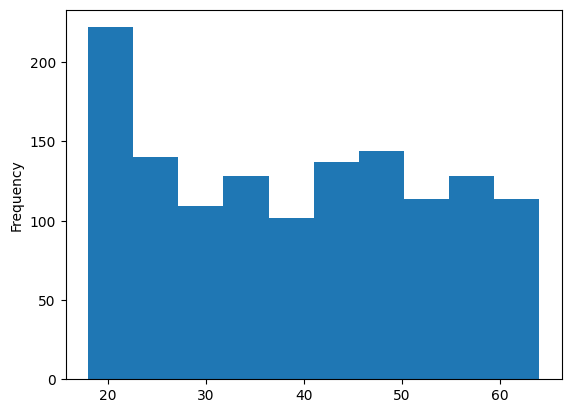

In [193]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

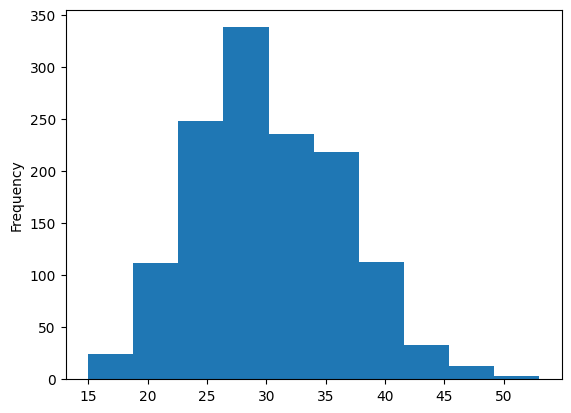

In [194]:
X["bmi"].plot(kind="hist")

In [195]:
X["children"].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18
